In [1]:
# This is a sample Notebook to demonstrate how to read "MNIST Dataset"

import numpy as np # linear algebra
import struct
from array import array
from os.path  import join

In [2]:
# MNIST Data Loader Class
#
class MnistDataloader(object):
    def __init__(self, training_images_filepath,training_labels_filepath,
                 test_images_filepath, test_labels_filepath):
        self.training_images_filepath = training_images_filepath
        self.training_labels_filepath = training_labels_filepath
        self.test_images_filepath = test_images_filepath
        self.test_labels_filepath = test_labels_filepath
    
    def read_images_labels(self, images_filepath, labels_filepath):        
        labels = []
        with open(labels_filepath, 'rb') as file:
            magic, size = struct.unpack(">II", file.read(8))
            if magic != 2049:
                raise ValueError('Magic number mismatch, expected 2049, got {}'.format(magic))
            labels = array("B", file.read())        
        
        with open(images_filepath, 'rb') as file:
            magic, size, rows, cols = struct.unpack(">IIII", file.read(16))
            if magic != 2051:
                raise ValueError('Magic number mismatch, expected 2051, got {}'.format(magic))
            image_data = array("B", file.read())        
        images = []
        for i in range(size):
            images.append([0] * rows * cols)
        for i in range(size):
            img = np.array(image_data[i * rows * cols:(i + 1) * rows * cols])
            img = img.reshape(28, 28)
            images[i][:] = img            
        
        return images, labels
            
    def load_data(self):
        x_train, y_train = self.read_images_labels(self.training_images_filepath, self.training_labels_filepath)
        x_test, y_test = self.read_images_labels(self.test_images_filepath, self.test_labels_filepath)
        return (x_train, y_train),(x_test, y_test)        
#
# Verify Reading Dataset via MnistDataloader class
#

In [3]:
%matplotlib inline
import random
import matplotlib.pyplot as plt

#
# Set file paths based on added MNIST Datasets
#t10k-images.idx3-ubyte
input_path = 'C:/Users/LENOVO/Desktop/Image classifier/'
training_images_filepath = join(input_path, 'train-images-idx3-ubyte')
training_labels_filepath = join(input_path, 'train-labels-idx1-ubyte')
test_images_filepath = join(input_path, 't10k-images-idx3-ubyte')
test_labels_filepath = join(input_path, 't10k-labels-idx1-ubyte')

#

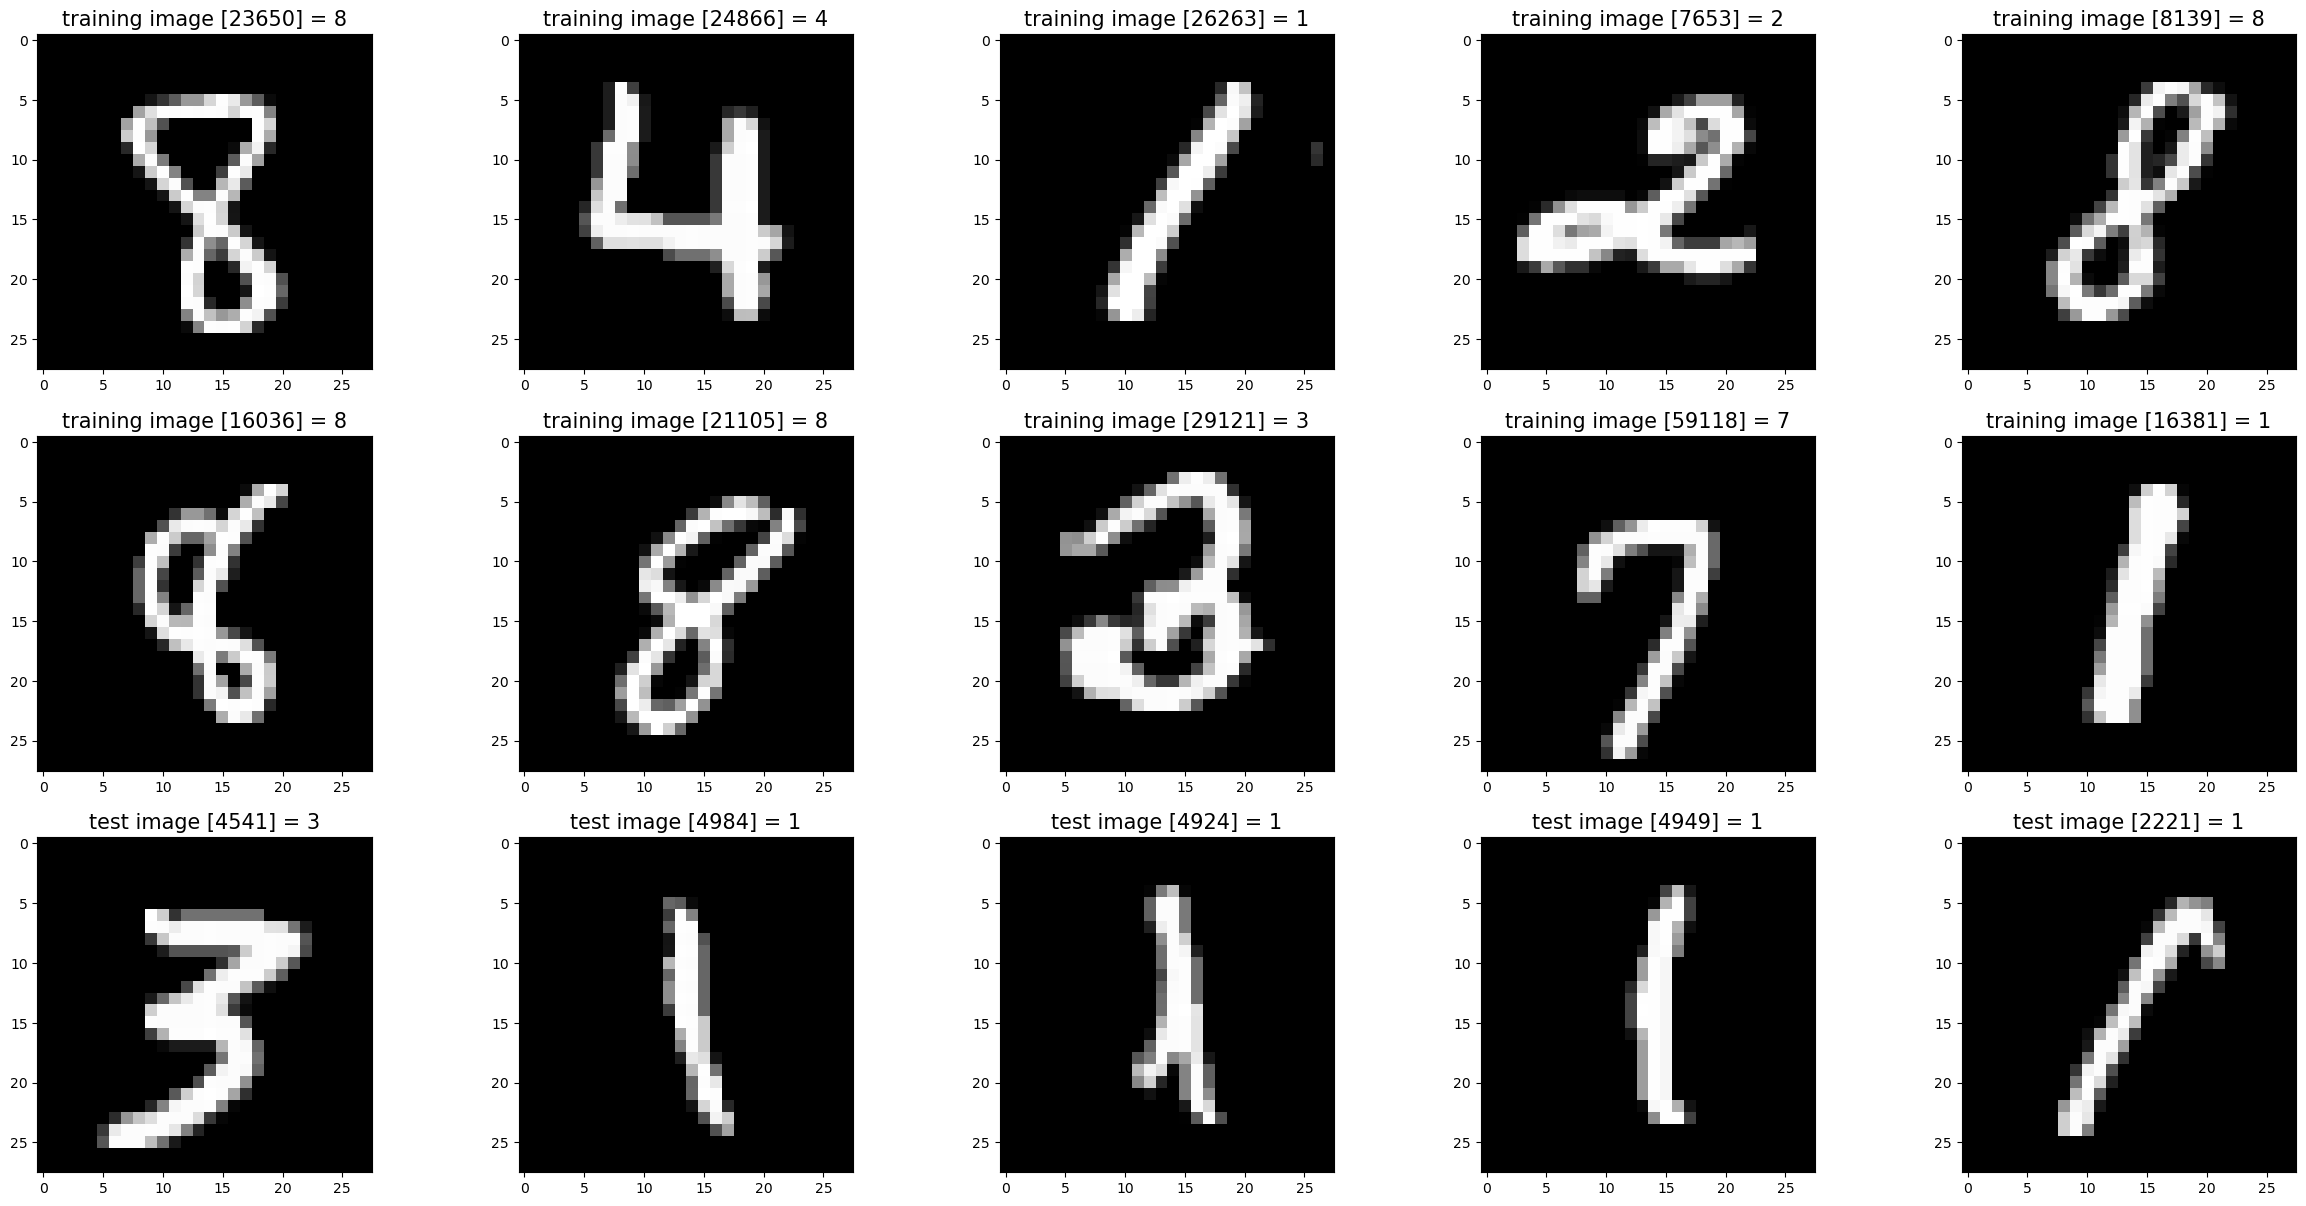

In [4]:
# Helper function to show a list of images with their relating titles
#
def show_images(images, title_texts):
    cols = 5
    rows = int(len(images)/cols) + 1
    plt.figure(figsize=(30,20))
    index = 1    
    for x in zip(images, title_texts):        
        image = x[0]        
        title_text = x[1]
        plt.subplot(rows, cols, index)        
        plt.imshow(image, cmap=plt.cm.gray)
        if (title_text != ''):
            plt.title(title_text, fontsize = 15);        
        index += 1

#
# Load MINST dataset
#
mnist_dataloader = MnistDataloader(training_images_filepath, training_labels_filepath, test_images_filepath, test_labels_filepath)
(x_train, y_train), (x_test, y_test) = mnist_dataloader.load_data()

#
# Show some random training and test images 
#
images_2_show = []
titles_2_show = []
for i in range(0, 10):
    r = random.randint(1, 60000)
    images_2_show.append(x_train[r])
    titles_2_show.append('training image [' + str(r) + '] = ' + str(y_train[r]))    

for i in range(0, 5):
    r = random.randint(1, 10000)
    images_2_show.append(x_test[r])        
    titles_2_show.append('test image [' + str(r) + '] = ' + str(y_test[r]))    

show_images(images_2_show, titles_2_show)

In [5]:
import tensorflow as tf
from tensorflow.keras import layers, models

# Load the dataset (for demonstration, using MNIST directly)
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()

# Preprocess the data
x_train = x_train.astype('float32') / 255.0  # Normalize pixel values to [0, 1]
x_test = x_test.astype('float32') / 255.0    # Normalize pixel values to [0, 1]
x_train = np.expand_dims(x_train, axis=-1)    # Add channel dimension
x_test = np.expand_dims(x_test, axis=-1)      # Add channel dimension

# Define the CNN model
model = models.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(10, activation='softmax')  # 10 classes for digits 0-9
])

C:\Users\LENOVO\anaconda3\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [6]:
x_train.shape

(60000, 28, 28, 1)

In [7]:
# Compile the model
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# Train the model
history = model.fit(x_train, y_train, epochs=10, batch_size=64, validation_split=0.2,)

# Evaluate the model
test_loss, test_accuracy = model.evaluate(x_test, y_test)
print(f'\nTest accuracy: {test_accuracy:.4f}')

# Plot training and validation accuracy and loss
plt.figure(figsize=(12, 4))

Epoch 1/10
750/750 ━━━━━━━━━━━━━━━━━━━━ 23s 26ms/step - accuracy: 0.8619 - loss: 0.4529 - val_accuracy: 0.9809 - val_loss: 0.0651
Epoch 2/10
750/750 ━━━━━━━━━━━━━━━━━━━━ 22s 28ms/step - accuracy: 0.9804 - loss: 0.0635 - val_accuracy: 0.9797 - val_loss: 0.0628
Epoch 3/10
750/750 ━━━━━━━━━━━━━━━━━━━━ 20s 26ms/step - accuracy: 0.9852 - loss: 0.0446 - val_accuracy: 0.9869 - val_loss: 0.0431
Epoch 4/10
750/750 ━━━━━━━━━━━━━━━━━━━━ 22s 29ms/step - accuracy: 0.9903 - loss: 0.0305 - val_accuracy: 0.9862 - val_loss: 0.0472
Epoch 5/10
750/750 ━━━━━━━━━━━━━━━━━━━━ 40s 28ms/step - accuracy: 0.9926 - loss: 0.0248 - val_accuracy: 0.9879 - val_loss: 0.0410
Epoch 6/10
750/750 ━━━━━━━━━━━━━━━━━━━━ 21s 29ms/step - accuracy: 0.9934 - loss: 0.0205 - val_accuracy: 0.9862 - val_loss: 0.0457
Epoch 7/10
750/750 ━━━━━━━━━━━━━━━━━━━━ 21s 28ms/step - accuracy: 0.9952 - loss: 0.0163 - val_accuracy: 0.9902 - val_loss: 0.0378
Epoch 8/10
750/750 ━━━━━━━━━━━━━━━━━━━━ 21s 27ms/step - accuracy: 0.9956 - loss: 0.0127 - 

<Figure size 1200x400 with 0 Axes>

<Figure size 1200x400 with 0 Axes>

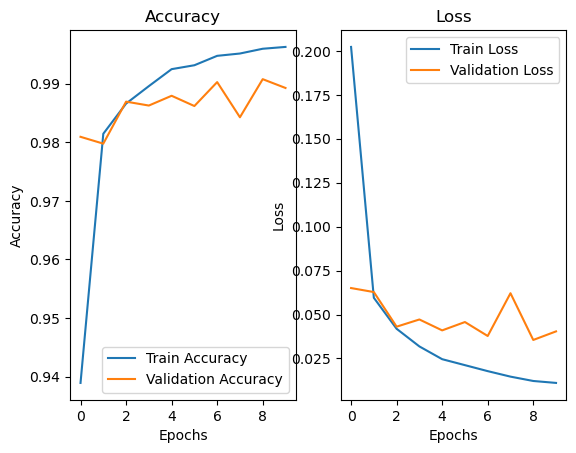

In [8]:
# Plot accuracy
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

# Plot loss
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

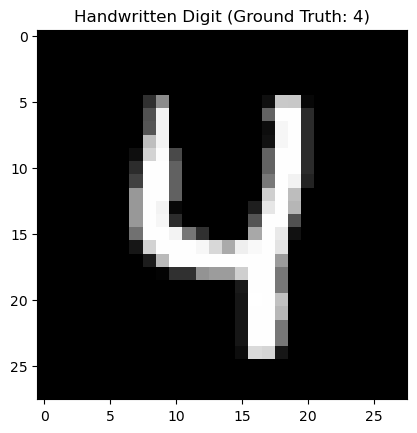

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 149ms/step
Model Prediction: 4


In [9]:
# Select a random image from the test set
random_index = np.random.randint(0, len(x_test))
test_image = x_test[random_index]

# Display the image
plt.imshow(test_image.squeeze(), cmap='gray')
plt.title('Handwritten Digit (Ground Truth: {})'.format(y_test[random_index]))
plt.show()

# Reshape the image to fit the model input (1 image, 28x28, 1 channel)
test_image = np.expand_dims(test_image, axis=0)

# Use the model to predict the class
predicted_probs = model.predict(test_image)
predicted_label = np.argmax(predicted_probs)

# Output the prediction
print(f'Model Prediction: {predicted_label}')


## Training on the personal data

In [10]:
from PIL import Image, ImageOps

In [11]:
x_ptrain=[]
y_ptrain=[]
for i in range(9):
    img_path = f'C:/Users/LENOVO/Desktop/Image classifier/numbers/{i}.jpg'  # Path to the custom image
    img = Image.open(img_path).convert('L')  # Convert to grayscale
    img = img.resize((28, 28))  # Resize to 28x28

    # Reverse B and W
    img= 255- np.array(img)
    
    img_array_new = np.array(img).astype('float32') / 255.0  # Normalize to [0, 1]
    # Preprocess the image as required (add batch and channel dimensions)
    img_array_new = np.expand_dims(img_array_new, axis=-1)  # Add channel dimension
    # img_array_new = np.expand_dims(img_array_new, axis=0)   # Add batch dimension
    x_ptrain.append(img_array_new) 
    y_ptrain.append(int(f'{i}'))

In [12]:
x_ptrain=np.array(x_ptrain)
y_ptrain=np.array(y_ptrain)

In [13]:
x_ptrain.shape

(9, 28, 28, 1)

In [14]:
y_ptrain.shape

(9,)

In [15]:
from tensorflow.keras.callbacks import EarlyStopping
early_stopping = EarlyStopping(monitor='val_loss', patience=3)

In [16]:
model.fit(x_ptrain, y_ptrain, epochs=10, callbacks=[early_stopping],validation_split=0.3,)

Epoch 1/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step - accuracy: 0.8333 - loss: 1.1813 - val_accuracy: 0.3333 - val_loss: 1.8536
Epoch 2/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 753ms/step - accuracy: 0.8333 - loss: 0.8756 - val_accuracy: 0.3333 - val_loss: 1.9289
Epoch 3/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 100ms/step - accuracy: 0.8333 - loss: 0.5226 - val_accuracy: 0.0000e+00 - val_loss: 2.2863
Epoch 4/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 167ms/step - accuracy: 1.0000 - loss: 0.2297 - val_accuracy: 0.0000e+00 - val_loss: 2.9115


## Data Augmentation

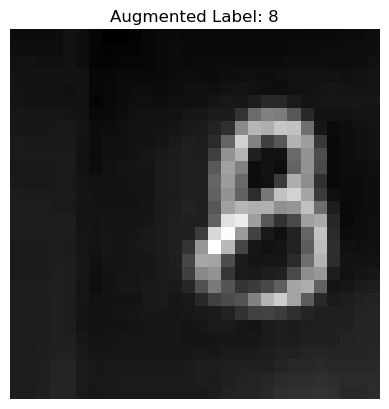

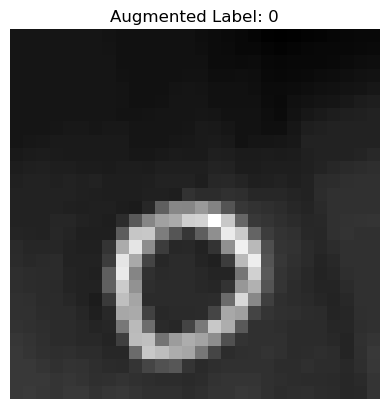

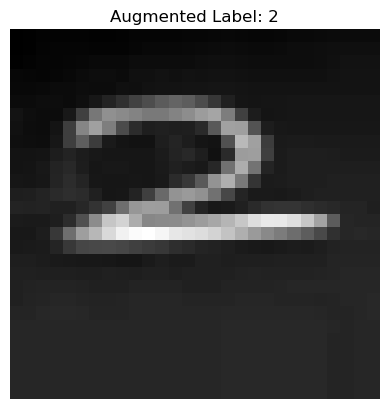

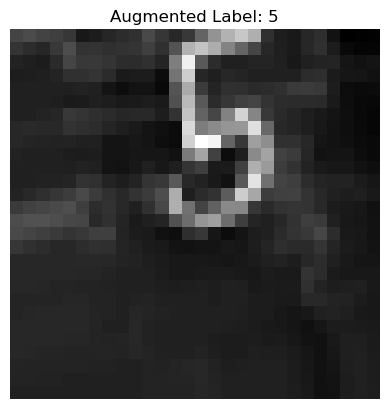

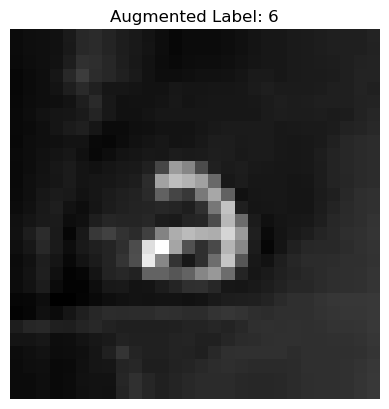

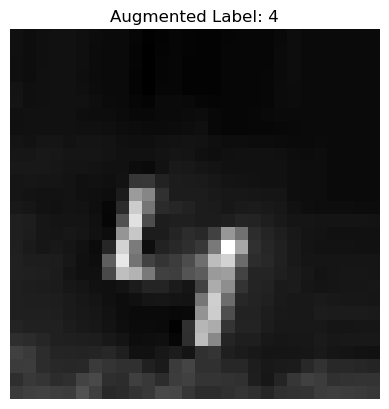

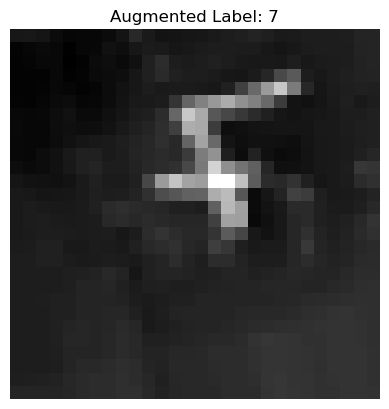

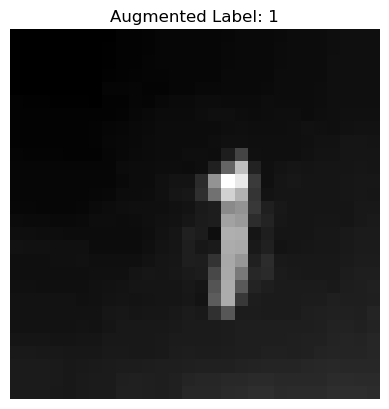

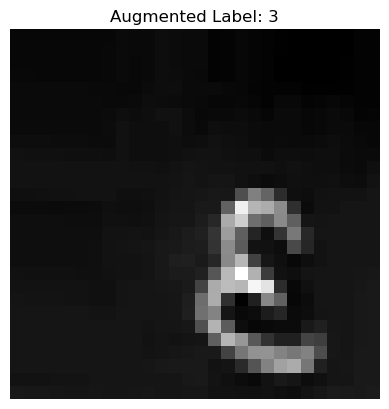

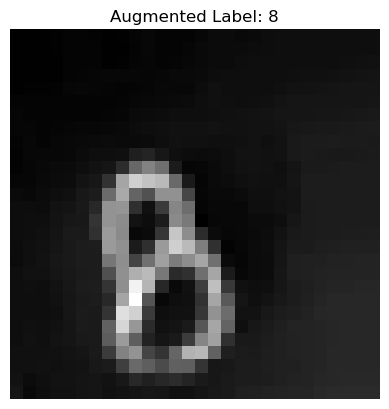

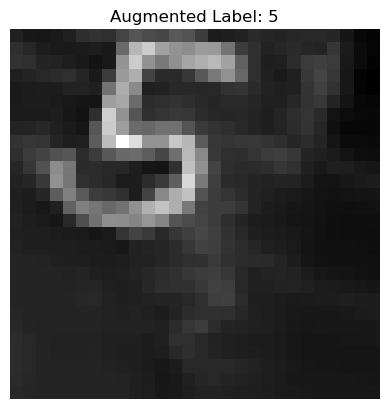

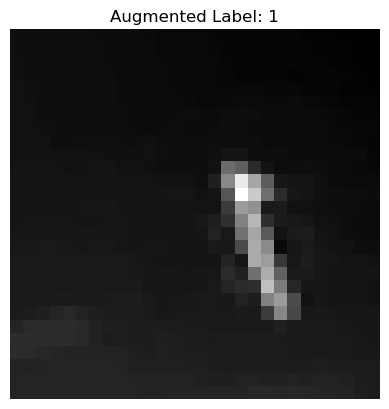

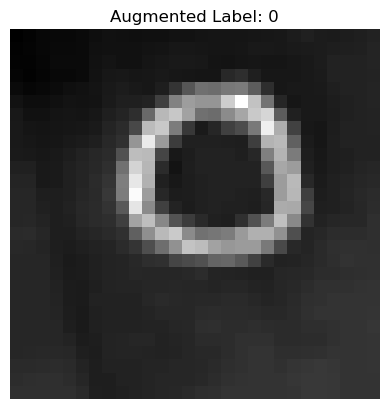

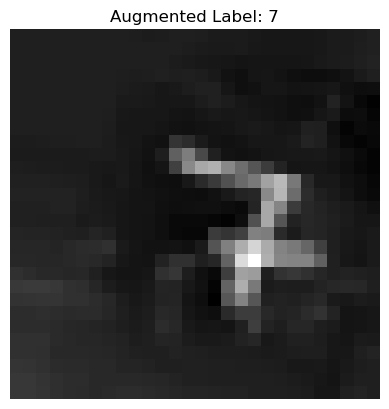

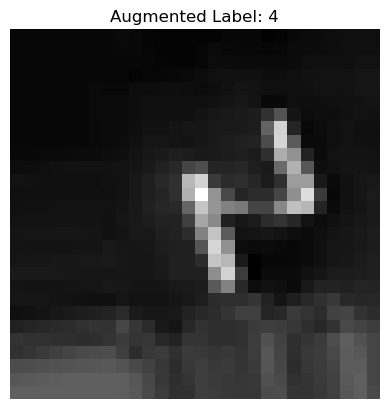

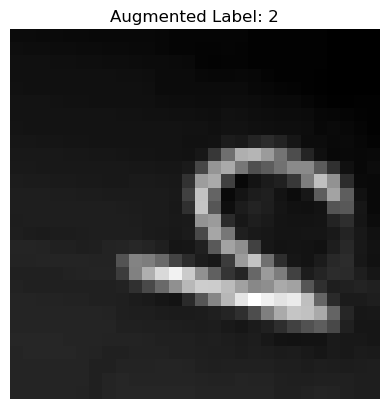

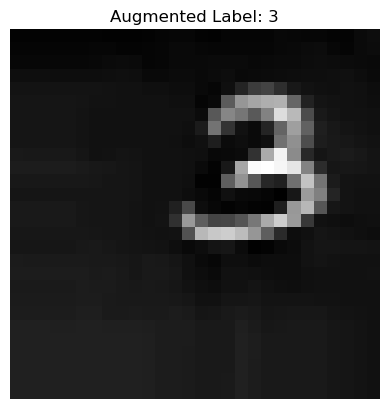

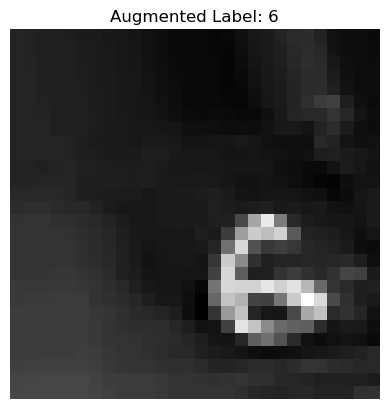

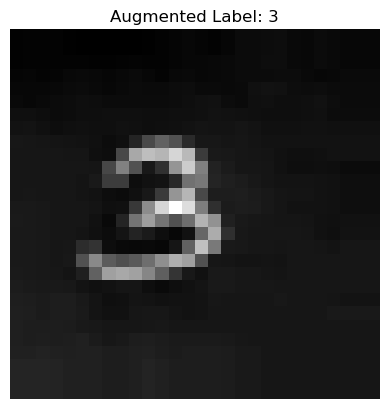

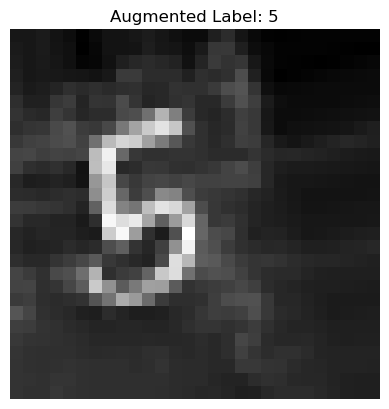

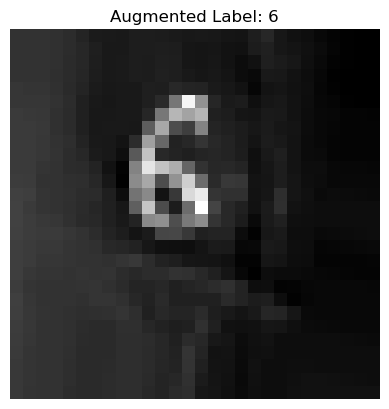

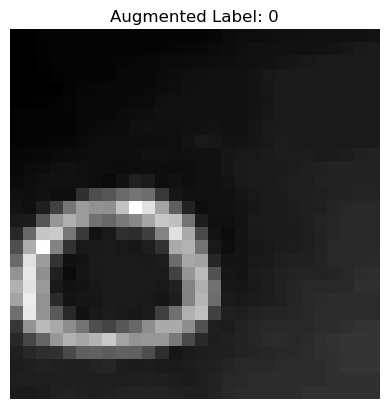

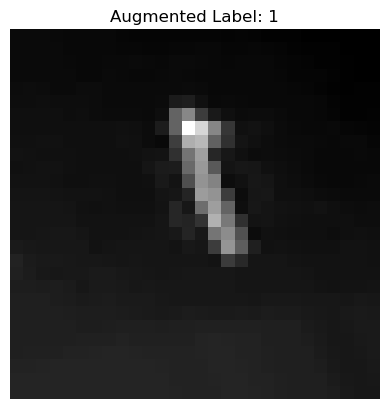

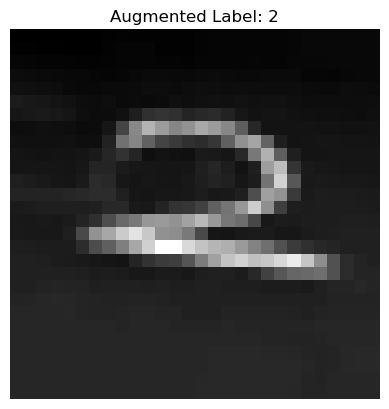

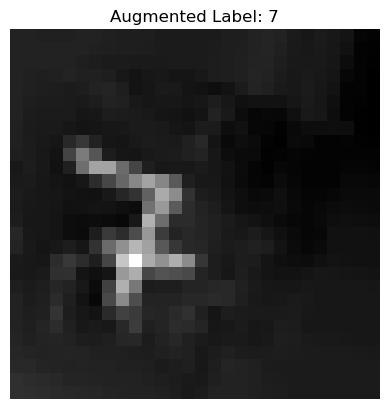

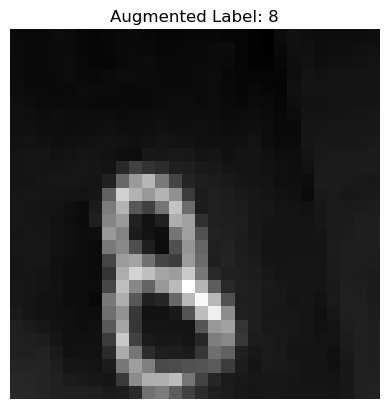

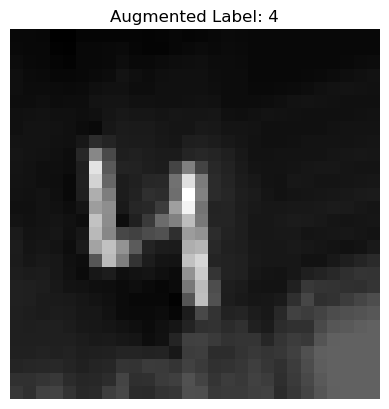

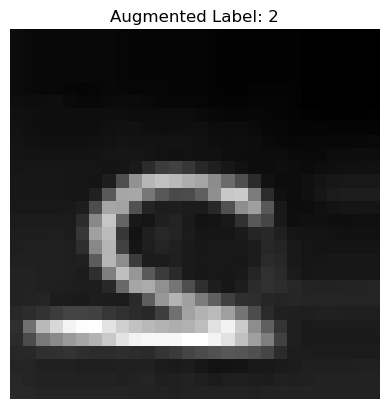

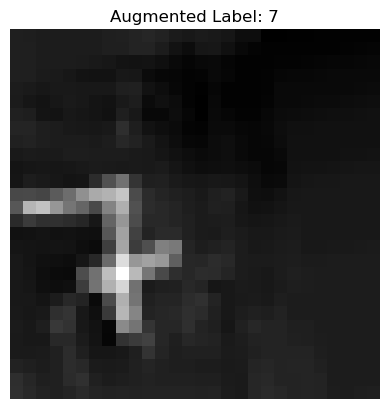

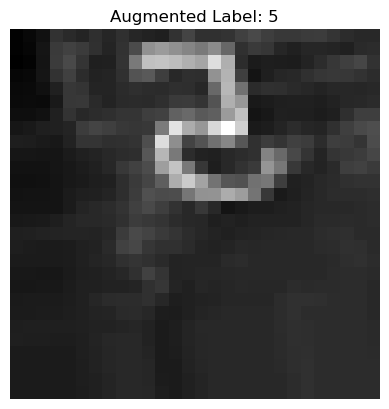

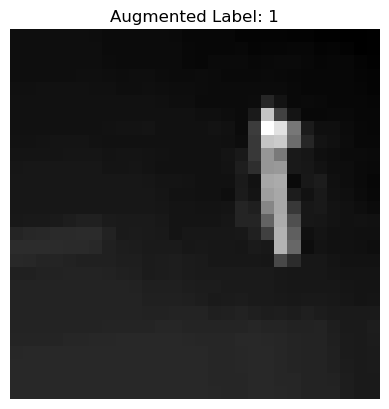

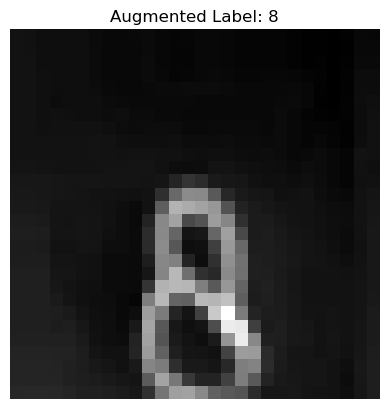

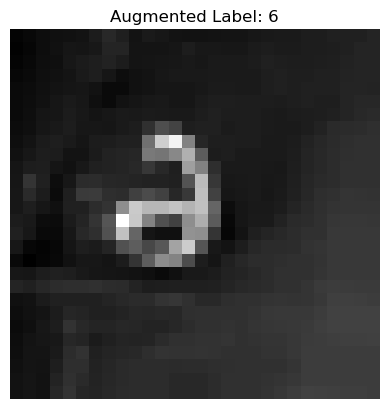

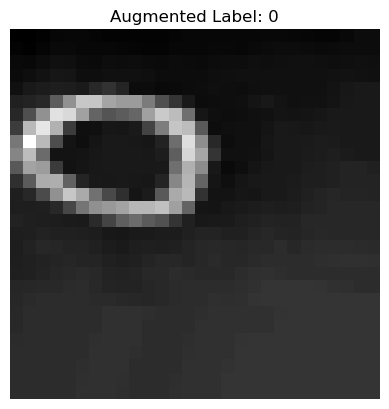

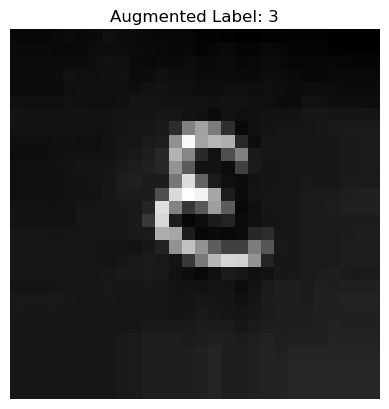

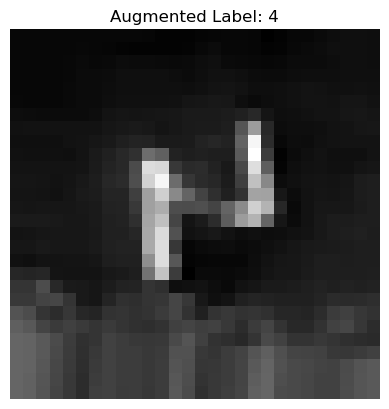

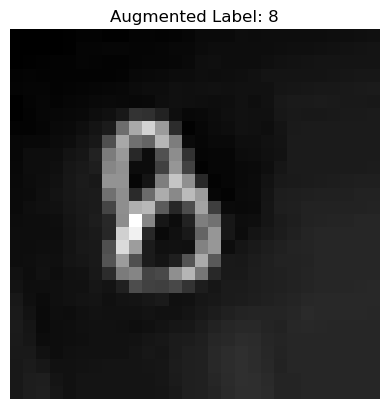

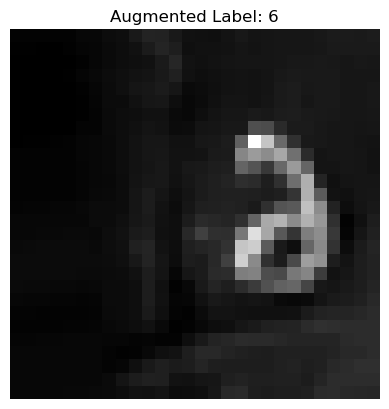

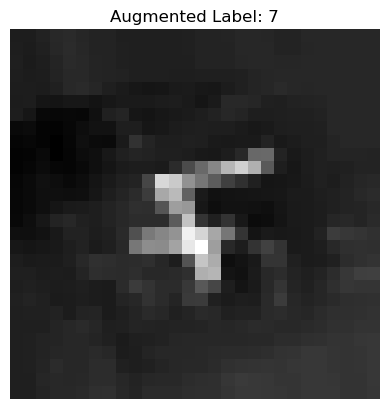

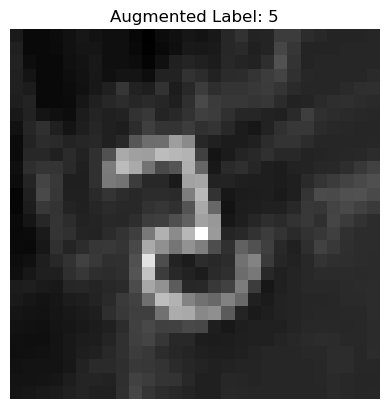

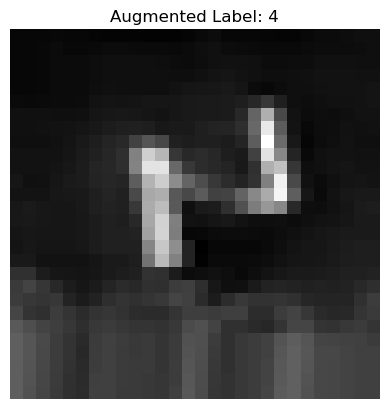

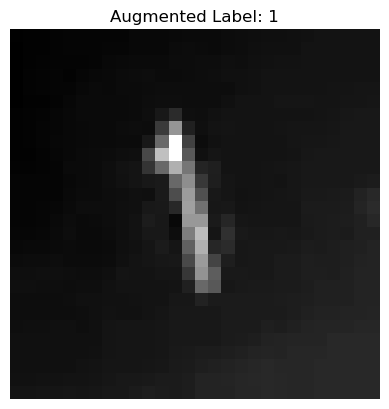

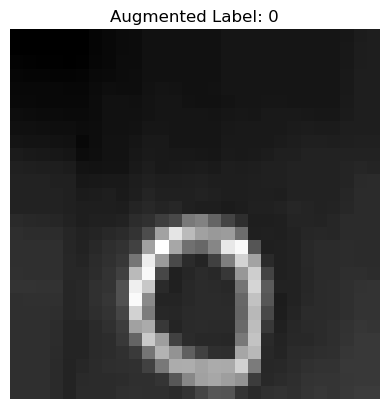

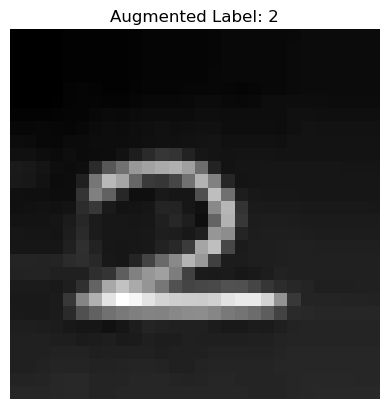

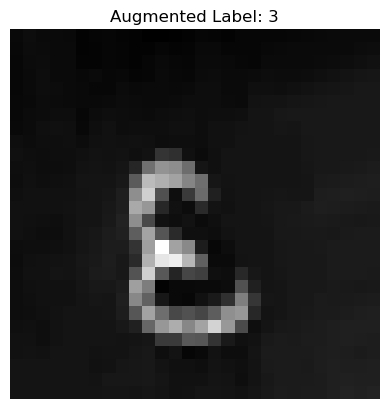

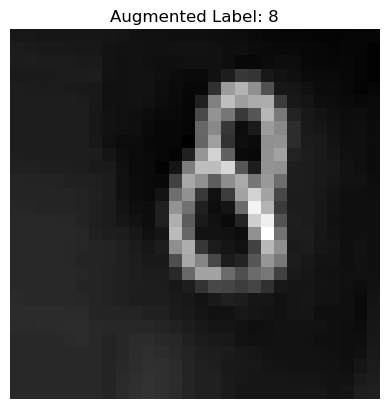

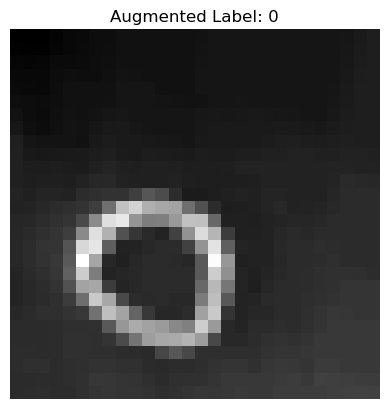

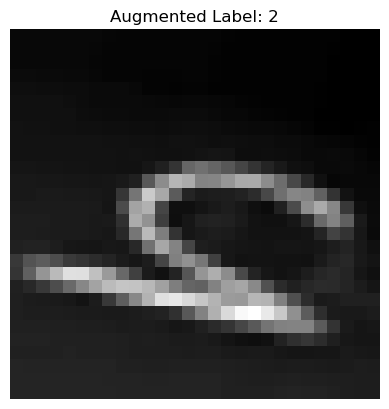

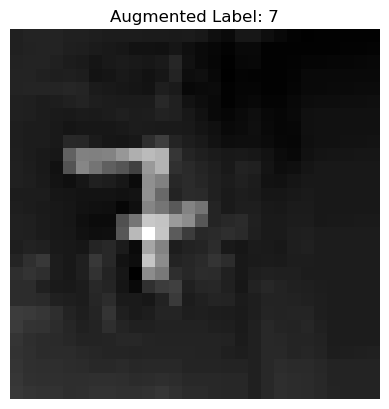

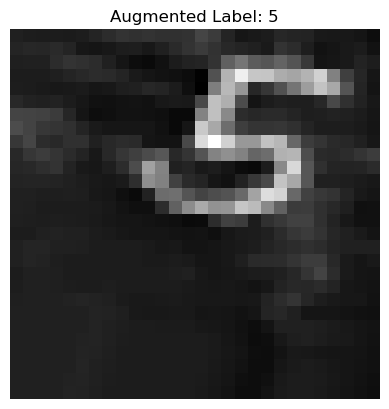

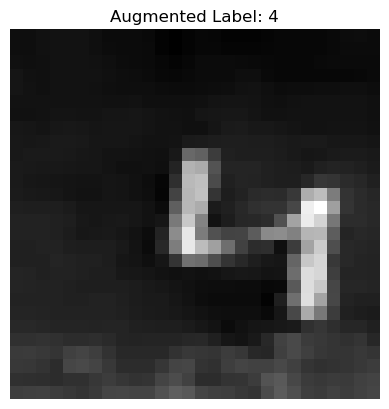

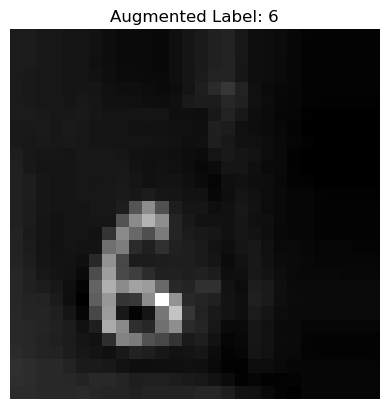

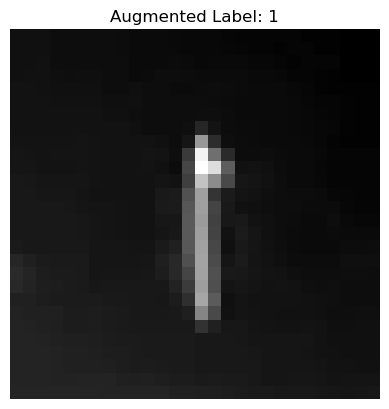

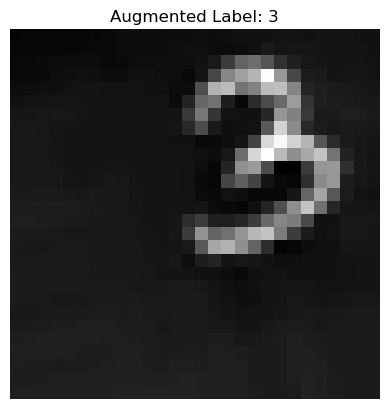

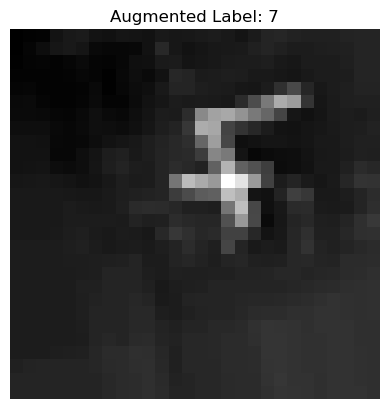

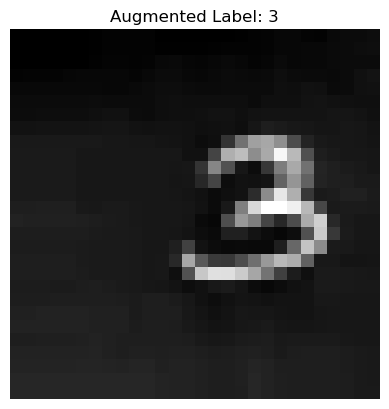

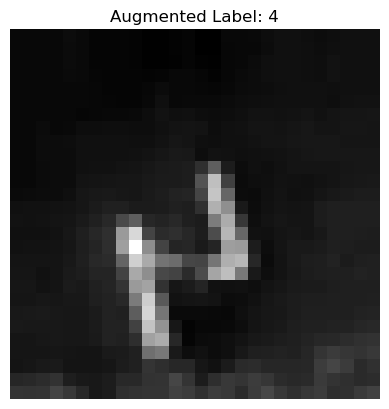

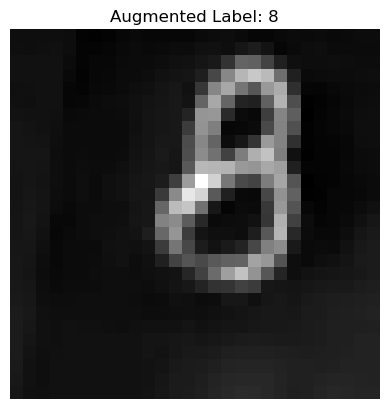

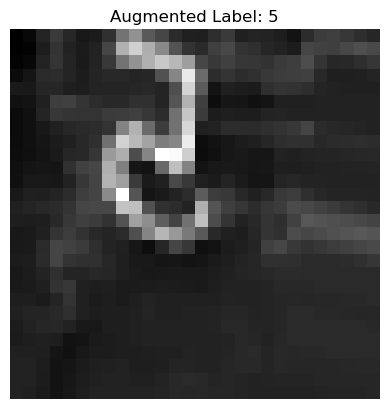

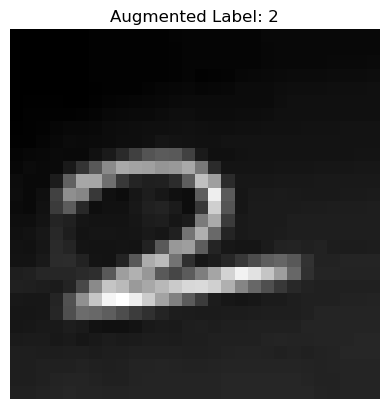

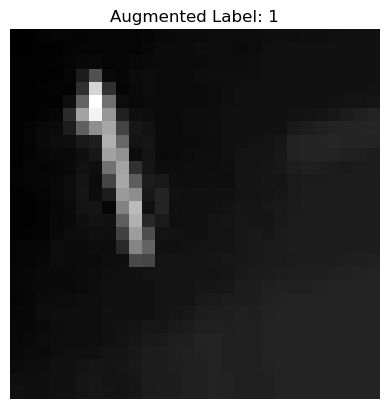

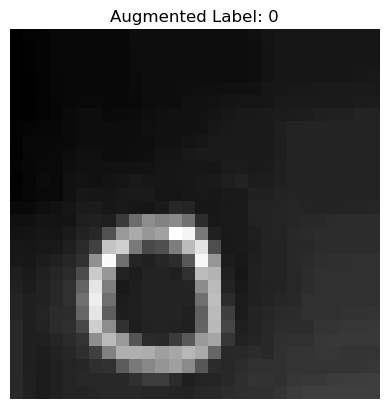

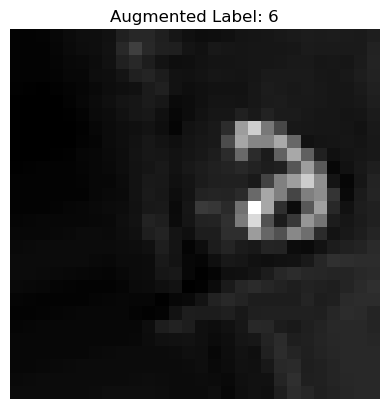

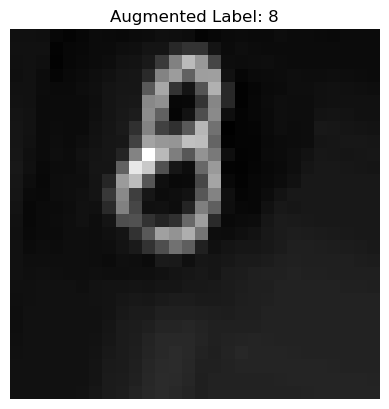

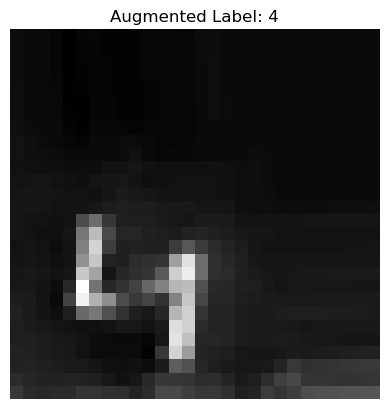

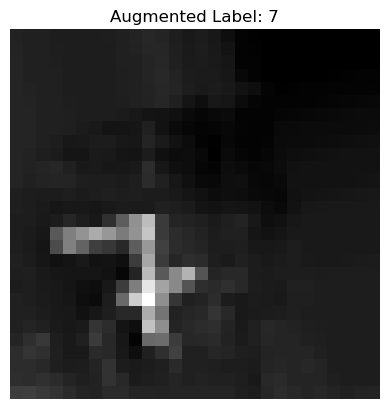

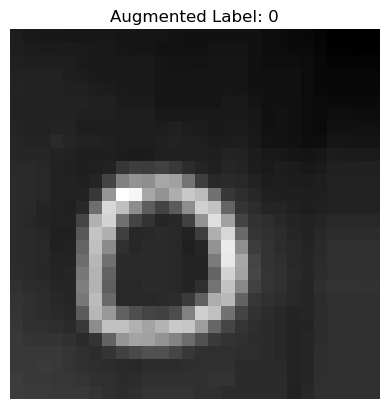

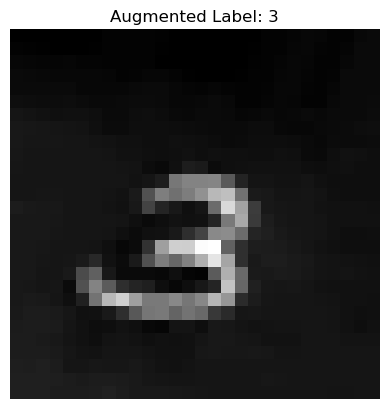

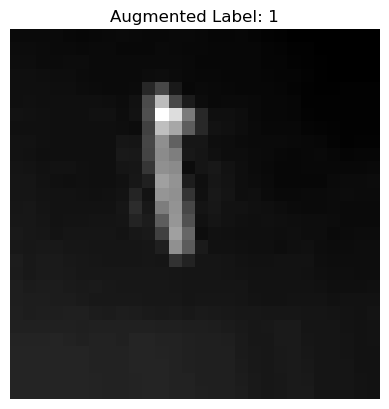

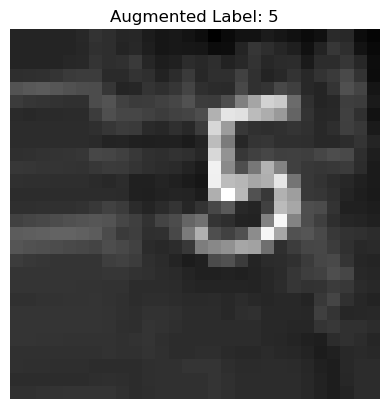

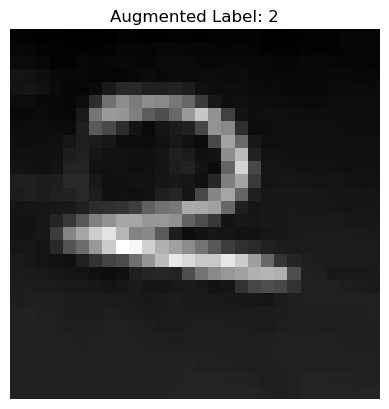

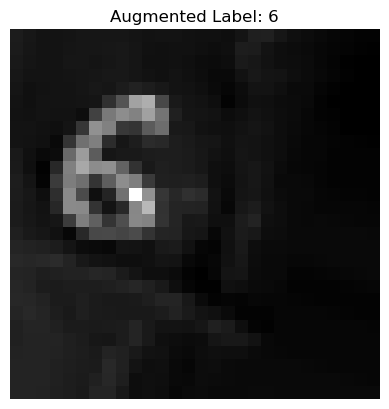

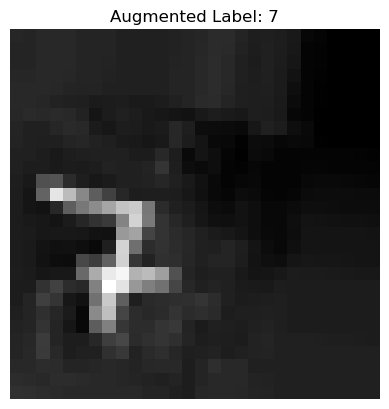

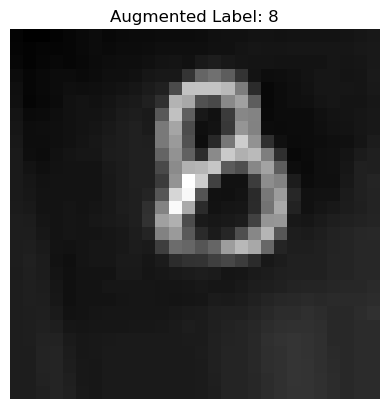

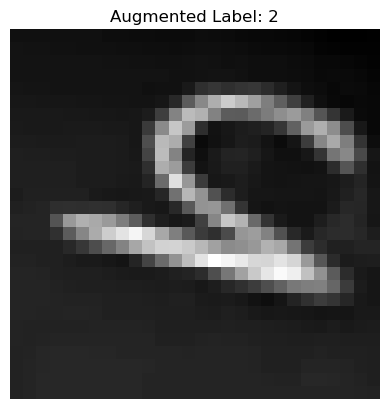

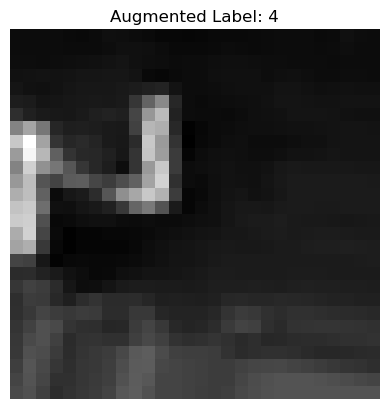

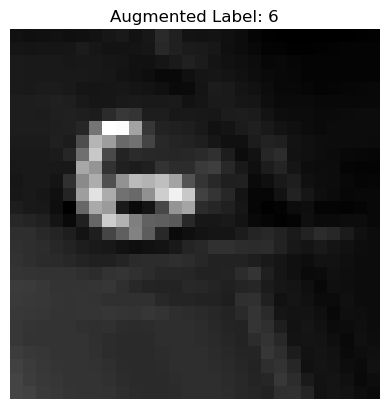

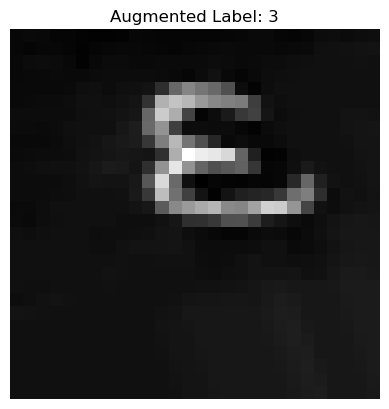

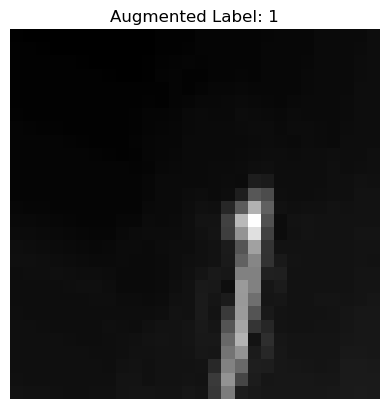

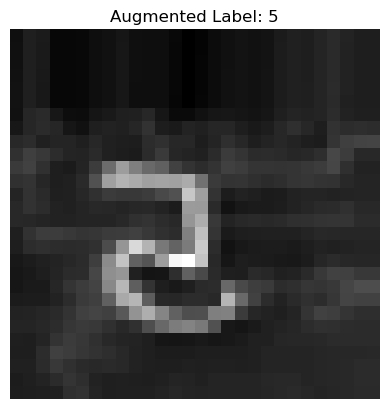

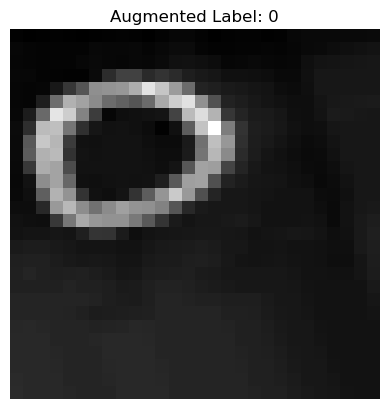

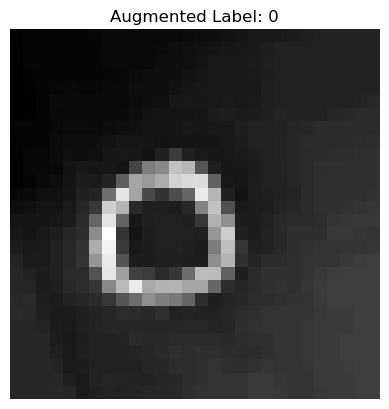

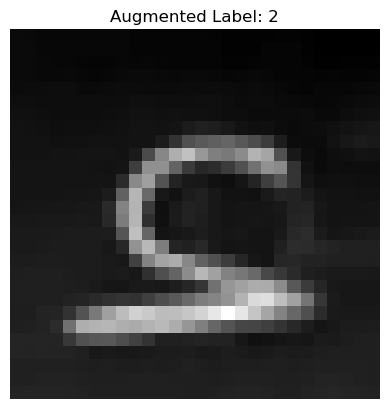

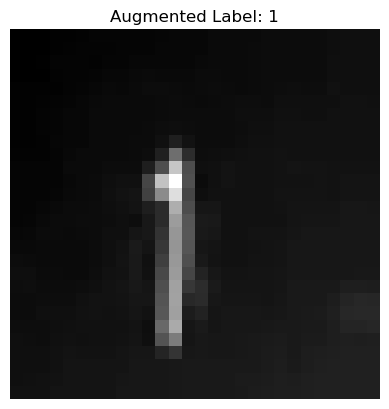

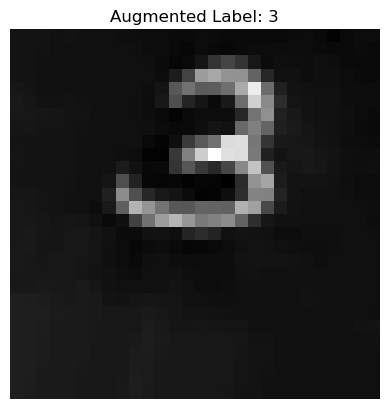

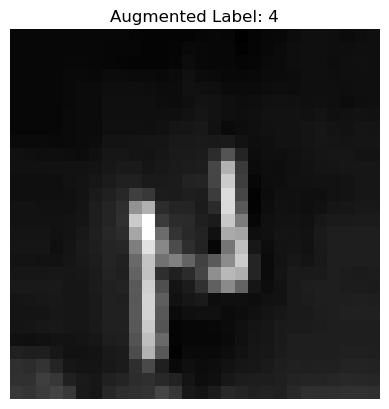

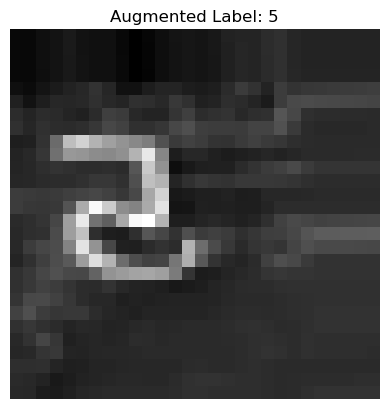

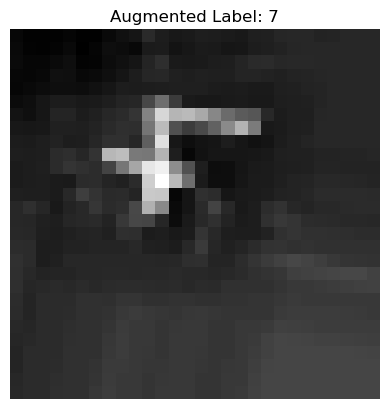

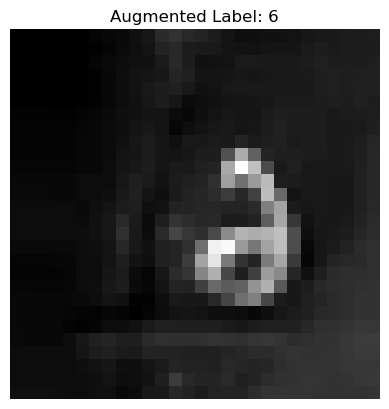

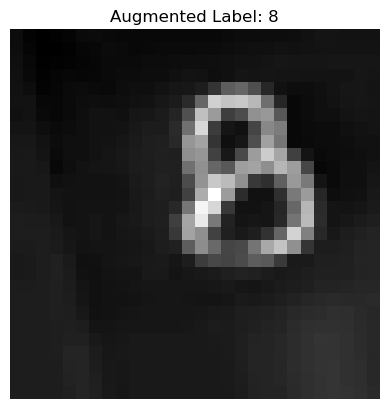

In [17]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Create an instance of ImageDataGenerator with desired augmentation parameters
data_gen = ImageDataGenerator(
    rotation_range=20,         # Randomly rotate images in the range (degrees)
    width_shift_range=0.2,     # Randomly translate images horizontally
    height_shift_range=0.2,    # Randomly translate images vertically
    shear_range=0.2,           # Shear transformation
    zoom_range=0.2,            # Randomly zoom into images
    horizontal_flip=True,       # Randomly flip images
    fill_mode='nearest'        # Fill any newly created pixels
)

# Example of augmenting a single image
augmented_images = data_gen.flow(x_ptrain, y_ptrain, batch_size=1)  # x_ptrain is your training data

# To visualize the augmented images, you can loop through the generator

# Get a batch of augmented images
for i in range(90):  # Show 5 examples
    img, label = next(augmented_images)
    plt.imshow(img[0].reshape(28, 28), cmap='gray')  # Reshape if necessary
    plt.title(f'Augmented Label: {label[0]}')
    plt.axis('off')
    plt.show()


In [18]:
augmented_x = []
augmented_y = []
for i in range(100):  # Specify how many augmented images you want to generate
    img_batch, label_batch = next(data_gen.flow(x_ptrain, y_ptrain, batch_size=1))
    
    # Append the image and label to the lists
    augmented_x.append(img_batch[0])  # img_batch has shape (1, 28, 28, 1), so we take the first item
    augmented_y.append(label_batch[0])  # label_batch is a one-hot encoded array

In [19]:
augmented_x=np.array(augmented_x)
augmented_y=np.array(augmented_y)

In [44]:
early_stopping = EarlyStopping(monitor='val_loss', patience=3)
model.fit(augmented_x, augmented_y, epochs=10, callbacks=[early_stopping],validation_split=0.2,)

Epoch 1/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 72ms/step - accuracy: 1.0000 - loss: 0.0181 - val_accuracy: 0.6000 - val_loss: 1.8338
Epoch 2/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step - accuracy: 1.0000 - loss: 0.0147 - val_accuracy: 0.6000 - val_loss: 1.8134
Epoch 3/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step - accuracy: 1.0000 - loss: 0.0126 - val_accuracy: 0.6000 - val_loss: 1.8062
Epoch 4/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step - accuracy: 1.0000 - loss: 0.0098 - val_accuracy: 0.6000 - val_loss: 1.7943
Epoch 5/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step - accuracy: 1.0000 - loss: 0.0104 - val_accuracy: 0.6000 - val_loss: 1.7914
Epoch 6/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step - accuracy: 1.0000 - loss: 0.0089 - val_accuracy: 0.6000 - val_loss: 1.7964
Epoch 7/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step - accuracy: 1.0000 - loss: 0.0072 - val_accuracy: 0.6000 - val_loss: 1.7915
Epoch 8/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step - accuracy: 1.0000 - loss: 0.0060 - val_accuracy: 0.6000 - val_loss: 1.8164


## Testing on given new image

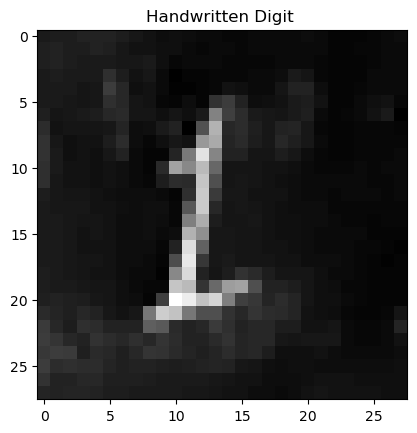

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
Model Prediction for the new image: 1


In [46]:
# After training, test the model on a new similar image
new_img = 'C:/Users/LENOVO/Desktop/Image classifier/One.jpg'  # Path to another similar image
new_img = Image.open(new_img).convert('L').resize((28, 28))
new_img = 255-np.array(new_img)
new_img_array = np.array(new_img).astype('float32') / 255.0
new_img_array = np.expand_dims(new_img_array, axis=-1)
new_img_array = np.expand_dims(new_img_array, axis=0)

# Display the image
plt.imshow(new_img_array.squeeze(), cmap='gray')
plt.title('Handwritten Digit '.format(y_test[random_index]))
plt.show()

# Predict the new image
predicted_probs = model.predict(new_img_array)
predicted_label = np.argmax(predicted_probs)

# Output the prediction
print(f'Model Prediction for the new image: {predicted_label}')